In [29]:
using Images, TestImages

┌ Info: Precompiling TestImages [5e47fb64-e119-507b-a336-dd2b206d9990]
└ @ Base loading.jl:1342


In [1]:
using Pluto
Pluto.run()


Opening http://localhost:1234/?secret=IA1X9ooL in your default browser... ~ have fun!

Press Ctrl+C in this terminal to stop Pluto



┌ Warning: Some registries failed to update:
│     — C:\Users\james\.julia\registries\General — failed to fetch from repo
└ @ Pkg.Types C:\buildbot\worker\package_win64\build\usr\share\julia\stdlib\v1.6\Pkg\src\Types.jl:1246


In [2]:
X1 = rand(1:5, 5, 5);
Y1 = [0 1 0
	  1 -4 1
	  0 1 0]; # 2D laplacian operator

In [4]:
@show X1,Y1

(X1, Y1) = ([4 5 5 5 3; 2 1 1 4 2; 1 4 1 1 2; 5 1 1 3 5; 2 5 5 4 5], [0 1 0; 1 -4 1; 0 1 0])


([4 5 … 5 3; 2 1 … 4 2; … ; 5 1 … 3 5; 2 5 … 4 5], [0 1 0; 1 -4 1; 0 1 0])

In [11]:
n = size(X1)[1];
m = size(Y1)[1];
k = n-m+1;
Z1 = zeros(k,k);

In [12]:
for i = 1:k
    for j = 1:k
        Z = X1[i:i+m-1,j:j+m-1] .* Y1
        Z1[i,j] = sum(Z)
    end
end

In [13]:
Z1

3×3 Matrix{Float64}:
   8.0  7.0  -7.0
 -12.0  3.0   6.0
  11.0  6.0  -1.0

In [ ]:
camera = testimage("cameraman")
kern = [0 1 0
        1 -4 1
        0 1 0]
camera_edge = imfilter(camera, kern)
mosaic(camera, camera_edge, nrow=1)

In [ ]:
img = testimage("lighthouse")

mosaic(
    img,
    red.(img), # R
    green.(img), # G
    blue.(img); # B
    nrow=1
)

In [3]:
X2 = [rand(1:5, 5, 5) for _ in 1:4]; # 4 通道输入
K2 = [copy(Y1) for _ in 1:4]; # 4 通道卷积核

In [25]:
n = 5
m = 3
k = n - m + 1
Z2 = [zeros(k,k) for _ in 1:4];

In [26]:
for t = 1:4
    for i = 1:k
        for j = 1:k
            Z = X2[t][i:i+m-1,j:j+m-1] .* K2[t]
            Z2[t][i,j] = sum(Z)
        end
    end
end

In [27]:
Z2

4-element Vector{Matrix{Int64}}:
 [10 -2 -1; 3 -5 -5; -6 -1 11]
 [-3 2 3; 4 5 -13; 1 6 2]
 [-7 3 0; -2 -1 2; 10 -11 6]
 [3 -9 16; -7 3 -10; -2 -4 2]

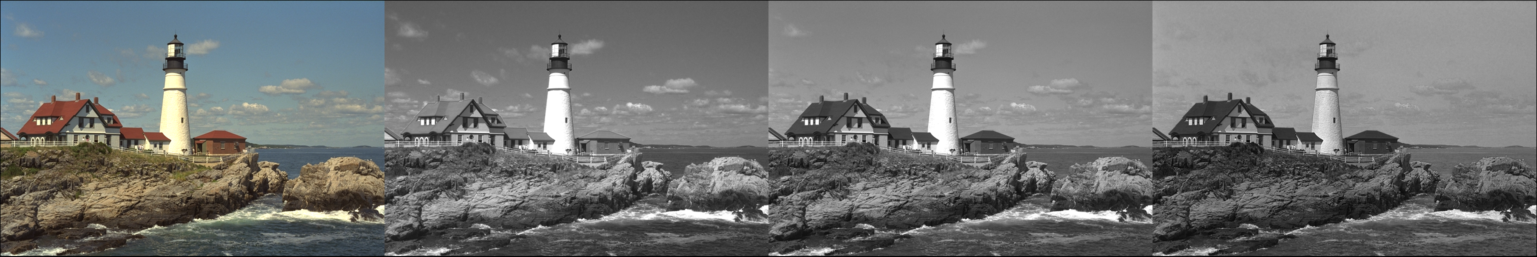

In [30]:
img = testimage("lighthouse")

mosaic(
    img,
    red.(img), # R
    green.(img), # G
    blue.(img); # B
    nrow=1
)

In [32]:
X3 = rand(1:5, 5, 5)
K = [[0 1 0
        1 -4 1
        0 1 0],
    [1/9 1/9 1/9
    1/9 1/9 1/9
    1/9 1/9 1/9]];

2-element Vector{Matrix{Int64}}:
 [5 2 … 3 1; 4 4 … 3 4; … ; 1 1 … 5 1; 2 3 … 1 2]
 [5 2 … 3 1; 4 4 … 3 4; … ; 1 1 … 5 1; 2 3 … 1 2]

In [37]:
X4 = [X3 for _ in 1:size(K)[1]]
n = 5
m = 3
k = n - m + 1
Z3 = [zeros(k,k) for _ in 1:2];
for t = 1:2
    for i = 1:k
        for j = 1:k
            Z = X4[t][i:i+m-1,j:j+m-1] .* K[t]
            Z3[t][i,j] = sum(Z)
        end
    end
end

In [41]:
@show Z3;

Z3 = [[-7.0 10.0 1.0; 3.0 -10.0 -4.0; 4.0 5.0 -11.0], [2.8888888888888893 3.0 2.9999999999999996; 2.333333333333334 3.1111111111111107 3.2222222222222223; 2.111111111111111 2.888888888888889 2.8888888888888893]]
